In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mamdouhjr","key":"a8bec9ebec68d1aebf6961421f8800b0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d prevek18/ames-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 474MB/s]


In [ ]:
!unzip -q ames-housing-dataset.zip

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/AmesHousing.csv")



---


**Preprocessing**


---



In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
missing = df.isnull().sum()
for col in missing[missing > 0].index:
    print(f"{col}: {missing[col]}")

Lot Frontage: 490
Alley: 2732
Mas Vnr Type: 1775
Mas Vnr Area: 23
Bsmt Qual: 80
Bsmt Cond: 80
Bsmt Exposure: 83
BsmtFin Type 1: 80
BsmtFin SF 1: 1
BsmtFin Type 2: 81
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Electrical: 1
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Fireplace Qu: 1422
Garage Type: 157
Garage Yr Blt: 159
Garage Finish: 159
Garage Cars: 1
Garage Area: 1
Garage Qual: 159
Garage Cond: 159
Pool QC: 2917
Fence: 2358
Misc Feature: 2824


<ipython-input-11-56363551e3b5>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df['Percentage'], y=missing_df.index, palette='viridis')


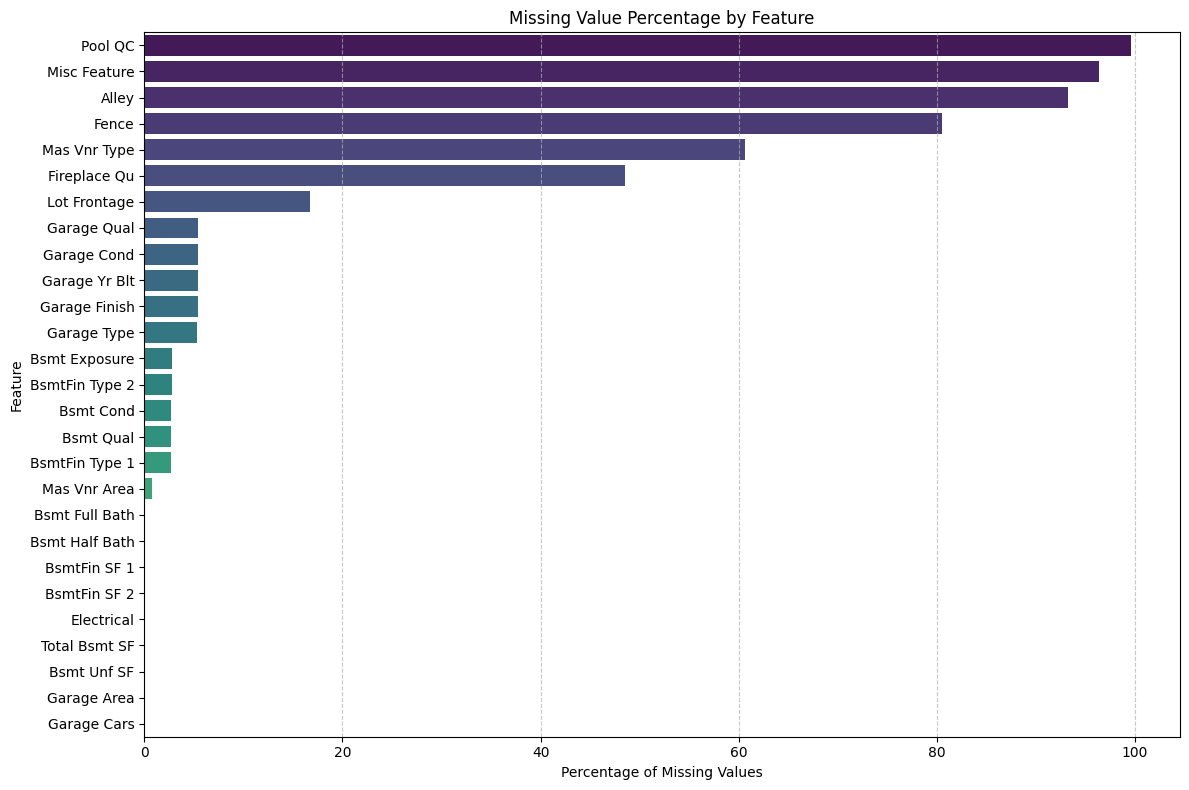

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_info = {
    'Lot Frontage': 490,
    'Alley': 2732,
    'Mas Vnr Type': 1775,
    'Mas Vnr Area': 23,
    'Bsmt Qual': 80,
    'Bsmt Cond': 80,
    'Bsmt Exposure': 83,
    'BsmtFin Type 1': 80,
    'BsmtFin SF 1': 1,
    'BsmtFin Type 2': 81,
    'BsmtFin SF 2': 1,
    'Bsmt Unf SF': 1,
    'Total Bsmt SF': 1,
    'Electrical': 1,
    'Bsmt Full Bath': 2,
    'Bsmt Half Bath': 2,
    'Fireplace Qu': 1422,
    'Garage Type': 157,
    'Garage Yr Blt': 159,
    'Garage Finish': 159,
    'Garage Cars': 1,
    'Garage Area': 1,
    'Garage Qual': 159,
    'Garage Cond': 159,
    'Pool QC': 2917,
    'Fence': 2358,
    'Misc Feature': 2824
}

total_rows = 2930
missing_df = pd.DataFrame.from_dict(missing_info, orient='index', columns=['Missing Values'])
missing_df['Percentage'] = (missing_df['Missing Values'] / total_rows) * 100
missing_df = missing_df.sort_values(by='Percentage', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df['Percentage'], y=missing_df.index, palette='viridis')
plt.title('Missing Value Percentage by Feature')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [ ]:

cols_to_drop = ['Pool QC', 'Alley', 'Mas Vnr Type', 'Misc Feature' , 'Fence']
df = df.drop(columns=cols_to_drop)

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


In [ ]:
print(df.shape[0])

2930


In [ ]:
missing = df.isnull().sum()
for col in missing[missing > 0].index:
    print(f"{col}: {missing[col]}")

In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [ ]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [ ]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
# prompt: i want to show df['SalePrice'].describe()

print(df['SalePrice'].describe())


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')


In [ ]:
categorical_cols = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
                    'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
                    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                    'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
                    'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                    'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
                    'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
                    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
                    'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']

for col in categorical_cols:
    unique_vals = df[col].unique()
    mapping = {val: i for i, val in enumerate(unique_vals)}
    df[col] = df[col].replace(mapping)


<ipython-input-21-33e13bb40403>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


In [ ]:
df['MS Zoning'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
import pandas as pd


bins = [0, 130000, 213500, float('inf')]
labels = ['Low', 'Medium', 'High']

df['SaleCategory'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

df['SaleCategory'] = df['SaleCategory'].astype('category').cat.codes


In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SaleCategory
0,1,526301100,20,0,141.0,31770,0,0,0,0,...,0,0,0,0,5,2010,0,0,215000,2
1,2,526350040,20,1,80.0,11622,0,1,0,0,...,0,120,0,0,6,2010,0,0,105000,0
2,3,526351010,20,0,81.0,14267,0,0,0,0,...,0,0,0,12500,6,2010,0,0,172000,1
3,4,526353030,20,0,93.0,11160,0,1,0,0,...,0,0,0,0,4,2010,0,0,244000,2
4,5,527105010,60,0,74.0,13830,0,0,0,0,...,0,0,0,0,3,2010,0,0,189900,1




---


**Start Training and Getting the results**


---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice', 'SaleCategory'], axis=1)
y = df['SaleCategory']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:07:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8890784982935154
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       148
           1       0.87      0.89      0.88       263
           2       0.95      0.93      0.94       175

    accuracy                           0.89       586
   macro avg       0.89      0.89      0.89       586
weighted avg       0.89      0.89      0.89       586



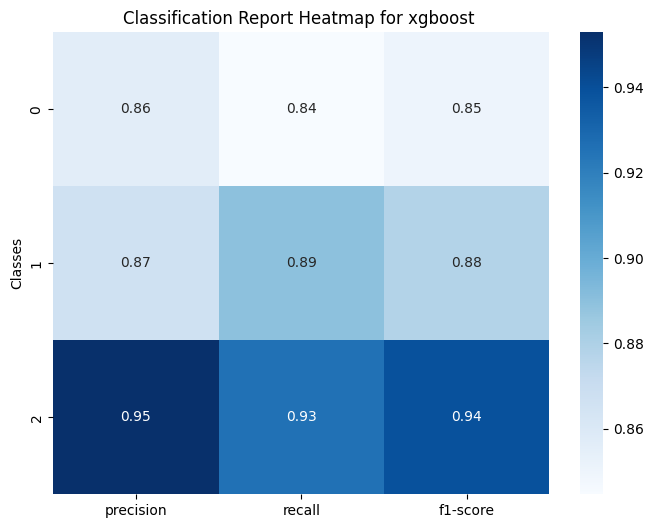

In [ ]:

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report.loc[df_report.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap for xgboost ')
plt.ylabel('Classes')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8600682593856656
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       148
           1       0.82      0.88      0.85       263
           2       0.94      0.89      0.91       175

    accuracy                           0.86       586
   macro avg       0.87      0.85      0.86       586
weighted avg       0.86      0.86      0.86       586



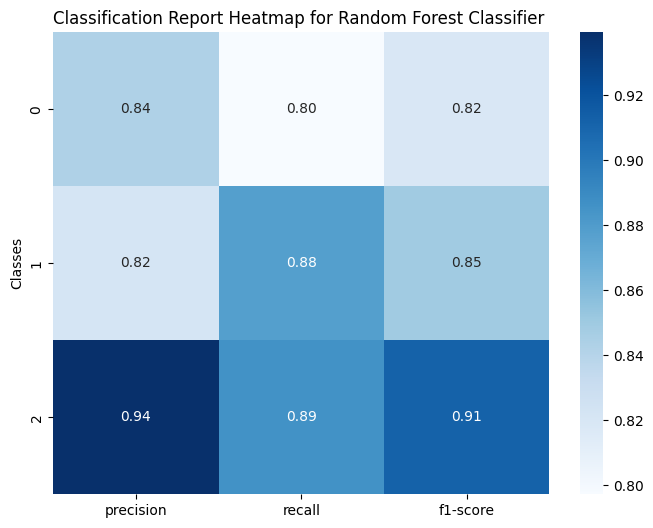

In [ ]:

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report.loc[df_report.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap for Random Forest Classifier ')
plt.ylabel('Classes')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score


model_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8600682593856656
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       148
           1       0.83      0.87      0.85       263
           2       0.93      0.87      0.90       175

    accuracy                           0.86       586
   macro avg       0.87      0.86      0.86       586
weighted avg       0.86      0.86      0.86       586



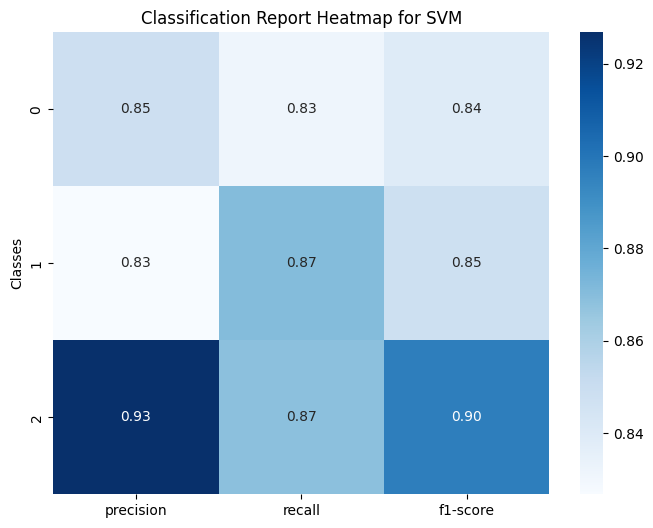

In [ ]:

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report.loc[df_report.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap for SVM')
plt.ylabel('Classes')
plt.show()


**Using GA**


---



In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 6.9 MB/s eta 0:00:00




---


**GA(SVM)**


---



In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms
import random

X = X_train
y = y_train

num_features = X.shape[1]

def evalFitness(individual):
    if sum(individual) == 0:
        return 0.,
    selected_idx = [i for i, bit in enumerate(individual) if bit == 1]
    X_selected = X[:, selected_idx]
    clf = SVC(kernel='linear')
    scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')
    return scores.mean(),

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=30)
NGEN = 15

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_fit = max(ind.fitness.values[0] for ind in population)
    print(f"Gen {gen+1} Best Accuracy : {best_fit:.4f}")

best_ind = tools.selBest(population, 1)[0]
print("Best Accuracy we got : ", best_ind.fitness.values[0])
print("Number of Features : ", sum(best_ind))
print("Selected Features(indexes):", [i for i, bit in enumerate(best_ind) if bit == 1])


Gen 1 Best Accuracy : 0.8392
Gen 2 Best Accuracy : 0.8392
Gen 3 Best Accuracy : 0.8392
Gen 4 Best Accuracy : 0.8396
Gen 5 Best Accuracy : 0.8404
Gen 6 Best Accuracy : 0.8456
Gen 7 Best Accuracy : 0.8439
Gen 8 Best Accuracy : 0.8486
Gen 9 Best Accuracy : 0.8486
Gen 10 Best Accuracy : 0.8486
Gen 11 Best Accuracy : 0.8486
Gen 12 Best Accuracy : 0.8486
Gen 13 Best Accuracy : 0.8490
Gen 14 Best Accuracy : 0.8490
Gen 15 Best Accuracy : 0.8490
Best Accuracy we got :  0.84898037286097
Number of Features :  42
Selected Features(indexes): [0, 1, 2, 3, 5, 6, 7, 12, 14, 15, 17, 18, 19, 21, 23, 26, 27, 28, 30, 31, 33, 37, 38, 39, 40, 42, 43, 46, 48, 49, 50, 54, 55, 56, 57, 58, 59, 61, 65, 66, 69, 75]


**GA(SVM) + SVM**

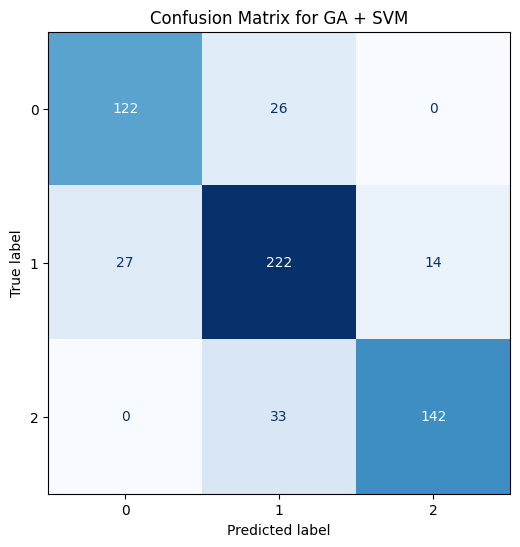

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       148
           1       0.79      0.84      0.82       263
           2       0.91      0.81      0.86       175

    accuracy                           0.83       586
   macro avg       0.84      0.83      0.83       586
weighted avg       0.83      0.83      0.83       586



In [ ]:
# الميزات اللي اختارها الـGA
selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]


X_train_ga = X_train[:, selected_features]
X_test_ga = X_test[:, selected_features]


final_model = SVC(kernel='linear', random_state=42)
final_model.fit(X_train_ga, y_train)


pred_ga = final_model.predict(X_test_ga)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm_ga = confusion_matrix(y_test, pred_ga)
disp_ga = ConfusionMatrixDisplay(confusion_matrix=cm_ga)

fig, ax = plt.subplots(figsize=(6,6))
disp_ga.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for GA + SVM")
plt.show()


print(classification_report(y_test, pred_ga))


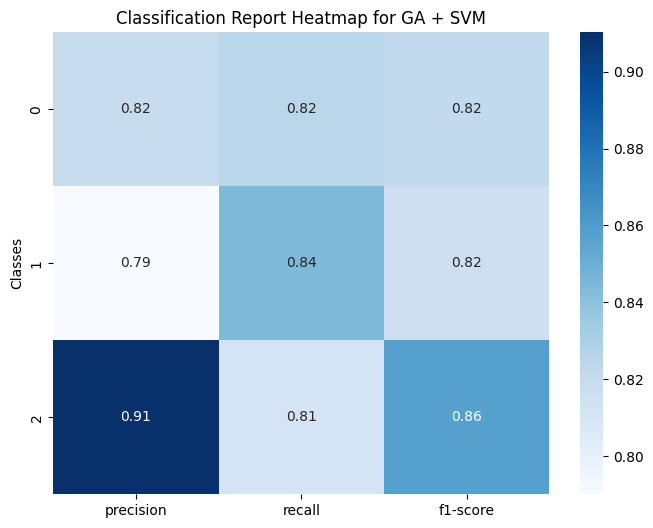

In [ ]:
report_ga = classification_report(y_test, pred_ga, output_dict=True)
df_report_ga = pd.DataFrame(report_ga).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']


sns.heatmap(df_report_ga.loc[df_report_ga.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")

plt.title('Classification Report Heatmap for GA + SVM')
plt.ylabel('Classes')
plt.show()

**GA( RANDOM FOREST TREE )**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms
import random

X = X_train
y = y_train

num_features = X.shape[1]

def evalFitness(individual):
    if sum(individual) == 0:
        return 0.,
    selected_idx = [i for i, bit in enumerate(individual) if bit == 1]
    X_selected = X[:, selected_idx]

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')

    return scores.mean(),


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


population = toolbox.population(n=30)
NGEN = 15

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_fit = max(ind.fitness.values[0] for ind in population)
    print(f"Gen {gen+1} Best Accuracy : {best_fit:.4f}")

best_ind = tools.selBest(population, 1)[0]
print("Best Accuracy we got : ", best_ind.fitness.values[0])
print("Number of Features : ", sum(best_ind))
print("Selected Features(indexes):", [i for i, bit in enumerate(best_ind) if bit == 1])


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Gen 1 Best Accuracy : 0.8532
Gen 2 Best Accuracy : 0.8532
Gen 3 Best Accuracy : 0.8554
Gen 4 Best Accuracy : 0.8554
Gen 5 Best Accuracy : 0.8554
Gen 6 Best Accuracy : 0.8588
Gen 7 Best Accuracy : 0.8588
Gen 8 Best Accuracy : 0.8588
Gen 9 Best Accuracy : 0.8601
Gen 10 Best Accuracy : 0.8601
Gen 11 Best Accuracy : 0.8601
Gen 12 Best Accuracy : 0.8601
Gen 13 Best Accuracy : 0.8601
Gen 14 Best Accuracy : 0.8601
Gen 15 Best Accuracy : 0.8601
Best Accuracy we got :  0.8600677929036138
Number of Features :  43
Selected Features(indexes): [0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 17, 18, 20, 21, 22, 23, 24, 26, 27, 30, 32, 33, 34, 35, 36, 39, 40, 41, 43, 45, 47, 50, 51, 53, 55, 58, 59, 60, 62, 64, 67, 72, 74]


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       148
           1       0.83      0.87      0.85       263
           2       0.93      0.89      0.91       175

    accuracy                           0.86       586
   macro avg       0.87      0.86      0.86       586
weighted avg       0.86      0.86      0.86       586



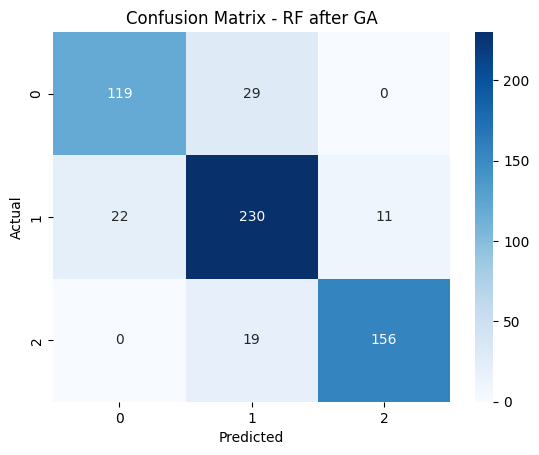

In [ ]:
selected_idx = [i for i, bit in enumerate(best_ind) if bit == 1]
X_selected = X[:, selected_idx]


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_selected, y)

X_test_selected = X_test[:, selected_idx]
y_pred = clf.predict(X_test_selected)


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF after GA")
plt.show()


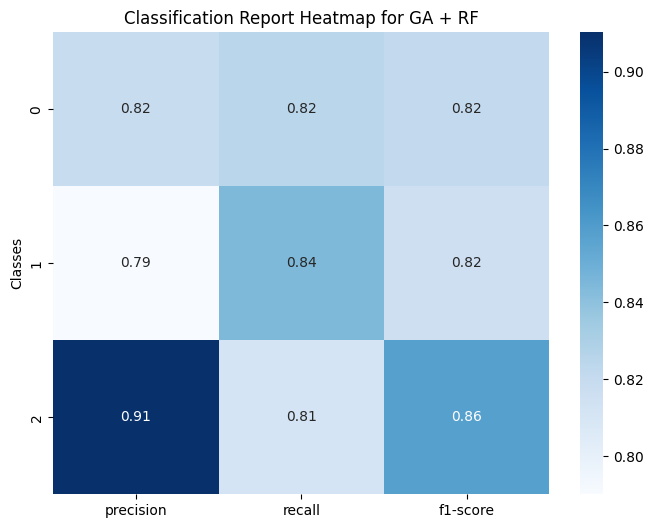

In [ ]:
report_ga = classification_report(y_test, pred_ga, output_dict=True)
df_report_ga = pd.DataFrame(report_ga).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report_ga.loc[df_report_ga.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")

plt.title('Classification Report Heatmap for GA + RF')
plt.ylabel('Classes')
plt.show()



---


**GA(XGboost)**


---



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms
from xgboost import XGBClassifier
import random

X = X_train
y = y_train

num_features = X.shape[1]

def evalFitness(individual):
    if sum(individual) == 0:
        return 0.,
    selected_idx = [i for i, bit in enumerate(individual) if bit == 1]
    X_selected = X[:, selected_idx]

    clf = XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
    scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')

    return scores.mean(),


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


population = toolbox.population(n=30)
NGEN = 15

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_fit = max(ind.fitness.values[0] for ind in population)
    print(f"Gen {gen+1} Best Accuracy : {best_fit:.4f}")

best_ind = tools.selBest(population, 1)[0]
print("Best Accuracy we got : ", best_ind.fitness.values[0])
print("Number of Features : ", sum(best_ind))
print("Selected Features(indexes):", [i for i, bit in enumerate(best_ind) if bit == 1])


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Gen 1 Best Accuracy : 0.8494
Gen 2 Best Accuracy : 0.8575
Gen 3 Best Accuracy : 0.8575
Gen 4 Best Accuracy : 0.8575
Gen 5 Best Accuracy : 0.8584
Gen 6 Best Accuracy : 0.8584
Gen 7 Best Accuracy : 0.8596
Gen 8 Best Accuracy : 0.8584
Gen 9 Best Accuracy : 0.8592
Gen 10 Best Accuracy : 0.8618
Gen 11 Best Accuracy : 0.8656
Gen 12 Best Accuracy : 0.8618
Gen 13 Best Accuracy : 0.8618
Gen 14 Best Accuracy : 0.8626
Gen 15 Best Accuracy : 0.8626
Best Accuracy we got :  0.8626346290525395
Number of Features :  45
Selected Features(indexes): [1, 2, 3, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 24, 28, 29, 30, 31, 32, 37, 38, 40, 42, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 59, 60, 62, 63, 64, 67, 69, 70, 74]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:44:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       148
           1       0.84      0.86      0.85       263
           2       0.91      0.90      0.91       175

    accuracy                           0.86       586
   macro avg       0.87      0.86      0.86       586
weighted avg       0.86      0.86      0.86       586



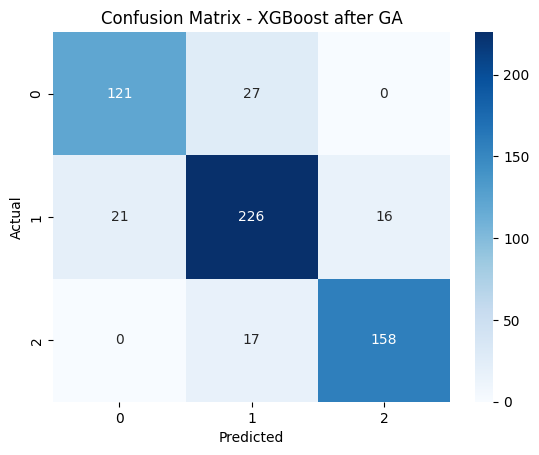

In [ ]:
selected_idx = [i for i, bit in enumerate(best_ind) if bit == 1]
X_selected = X[:, selected_idx]


clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
clf.fit(X_selected, y)

X_test_selected = X_test[:, selected_idx]
y_pred = clf.predict(X_test_selected)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost after GA")
plt.show()

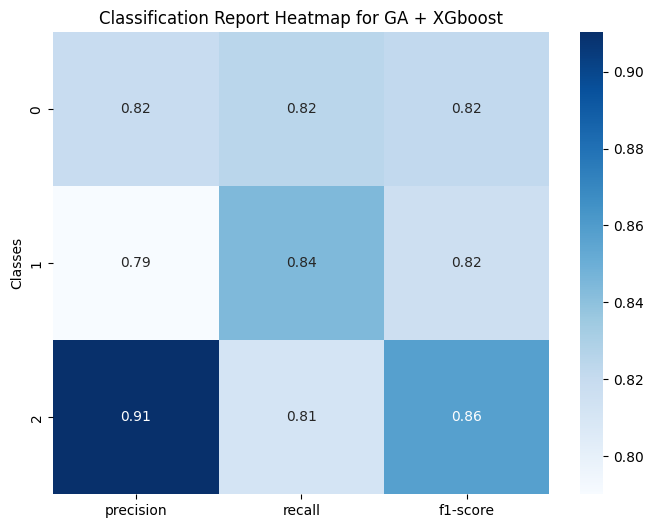

In [ ]:
report_ga = classification_report(y_test, pred_ga, output_dict=True)
df_report_ga = pd.DataFrame(report_ga).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']


sns.heatmap(df_report_ga.loc[df_report_ga.index[:-3], metrics], annot=True, cmap='Blues', fmt=".2f")

plt.title('Classification Report Heatmap for GA + XGboost')
plt.ylabel('Classes')
plt.show()



---


**PSO**




---



**PSO(SVM)**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

n_particles = 30
n_iterations = 50
n_features = X_train.shape[1]

w = 0.5
c1 = 1.5
c2 = 1.5
SEED = 42
np.random.seed(SEED)

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)


personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)


for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = SVC(kernel='linear', random_state=SEED)
        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()


for iteration in range(n_iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = SVC(kernel='linear', random_state=SEED)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"[SVM] Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

best_features_mask_svm = global_best_position > 0.5
selected_features_svm = np.where(best_features_mask_svm)[0]
print("\nBest feature indices selected by PSO for SVM:")
print(selected_features_svm.tolist())

[SVM] Iteration 1/50, Best Accuracy: 0.8669
[SVM] Iteration 2/50, Best Accuracy: 0.8703
[SVM] Iteration 3/50, Best Accuracy: 0.8703
[SVM] Iteration 4/50, Best Accuracy: 0.8703
[SVM] Iteration 5/50, Best Accuracy: 0.8720
[SVM] Iteration 6/50, Best Accuracy: 0.8737
[SVM] Iteration 7/50, Best Accuracy: 0.8737
[SVM] Iteration 8/50, Best Accuracy: 0.8737
[SVM] Iteration 9/50, Best Accuracy: 0.8737
[SVM] Iteration 10/50, Best Accuracy: 0.8737
[SVM] Iteration 11/50, Best Accuracy: 0.8737
[SVM] Iteration 12/50, Best Accuracy: 0.8737
[SVM] Iteration 13/50, Best Accuracy: 0.8737
[SVM] Iteration 14/50, Best Accuracy: 0.8737
[SVM] Iteration 15/50, Best Accuracy: 0.8737
[SVM] Iteration 16/50, Best Accuracy: 0.8737
[SVM] Iteration 17/50, Best Accuracy: 0.8754
[SVM] Iteration 18/50, Best Accuracy: 0.8771
[SVM] Iteration 19/50, Best Accuracy: 0.8771
[SVM] Iteration 20/50, Best Accuracy: 0.8771
[SVM] Iteration 21/50, Best Accuracy: 0.8771
[SVM] Iteration 22/50, Best Accuracy: 0.8771
[SVM] Iteration 23/



---


**PSO(SVM) + SVM**


---




Classification Report for SVM (using PSO-selected features):
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       148
           1       0.85      0.89      0.87       263
           2       0.94      0.88      0.91       175

    accuracy                           0.88       586
   macro avg       0.89      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



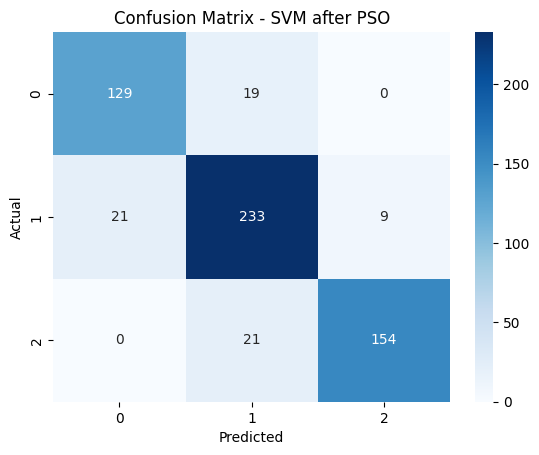

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train_pso_svm = X_train[:, best_features_mask_svm]
X_test_pso_svm = X_test[:, best_features_mask_svm]


final_svm_model = SVC(kernel='linear', random_state=42)
final_svm_model.fit(X_train_pso_svm, y_train)


y_pred_svm = final_svm_model.predict(X_test_pso_svm)


print("\nClassification Report for SVM (using PSO-selected features):")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM after PSO")
plt.show()


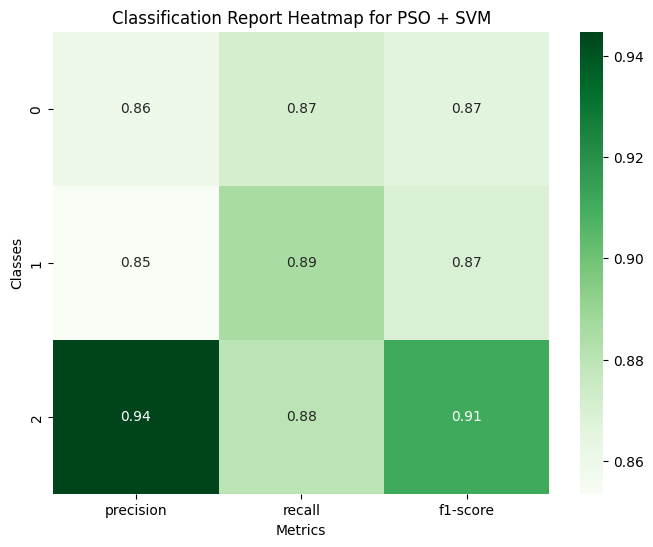

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

report_pso_svm = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_pso_svm = pd.DataFrame(report_pso_svm).transpose()

plt.figure(figsize=(8, 6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report_pso_svm.loc[df_report_pso_svm.index[:-3], metrics], annot=True, cmap='Greens', fmt=".2f")

plt.title('Classification Report Heatmap for PSO + SVM')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()




---
**PSO + RF**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

n_particles = 30
n_iterations = 50
n_features = X_train.shape[1]

w = 0.5
c1 = 1.5
c2 = 1.5

np.random.seed(42)

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)

personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)


for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)


global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()


for iteration in range(n_iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

best_features_mask_rf = global_best_position > 0.5
selected_feature_indices_rf = np.where(best_features_mask_rf)[0].tolist()

print("\nBest feature indices selected by PSO for Random Forest:")
print(selected_feature_indices_rf)


Iteration 1/50, Best Accuracy: 0.8788
Iteration 2/50, Best Accuracy: 0.8788
Iteration 3/50, Best Accuracy: 0.8788
Iteration 4/50, Best Accuracy: 0.8823
Iteration 5/50, Best Accuracy: 0.8840
Iteration 6/50, Best Accuracy: 0.8840
Iteration 7/50, Best Accuracy: 0.8840
Iteration 8/50, Best Accuracy: 0.8840
Iteration 9/50, Best Accuracy: 0.8874
Iteration 10/50, Best Accuracy: 0.8874
Iteration 11/50, Best Accuracy: 0.8874
Iteration 12/50, Best Accuracy: 0.8874
Iteration 13/50, Best Accuracy: 0.8874
Iteration 14/50, Best Accuracy: 0.8874
Iteration 15/50, Best Accuracy: 0.8874
Iteration 16/50, Best Accuracy: 0.8874
Iteration 17/50, Best Accuracy: 0.8874
Iteration 18/50, Best Accuracy: 0.8874
Iteration 19/50, Best Accuracy: 0.8874
Iteration 20/50, Best Accuracy: 0.8874
Iteration 21/50, Best Accuracy: 0.8874
Iteration 22/50, Best Accuracy: 0.8874
Iteration 23/50, Best Accuracy: 0.8874
Iteration 24/50, Best Accuracy: 0.8874
Iteration 25/50, Best Accuracy: 0.8874
Iteration 26/50, Best Accuracy: 0.


Classification Report for RF (using PSO-selected features):
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       148
           1       0.85      0.89      0.87       263
           2       0.94      0.88      0.91       175

    accuracy                           0.88       586
   macro avg       0.89      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



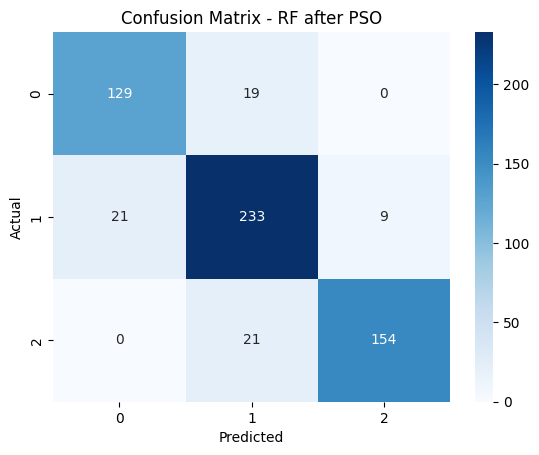

In [ ]:
X_train_rf = X_train[:, best_features_mask_rf]
X_test_rf = X_test[:, best_features_mask_rf]

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train)
y_pred_rf = model_rf.predict(X_test_rf)

print("\nClassification Report for RF (using PSO-selected features):")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF after PSO")
plt.show()

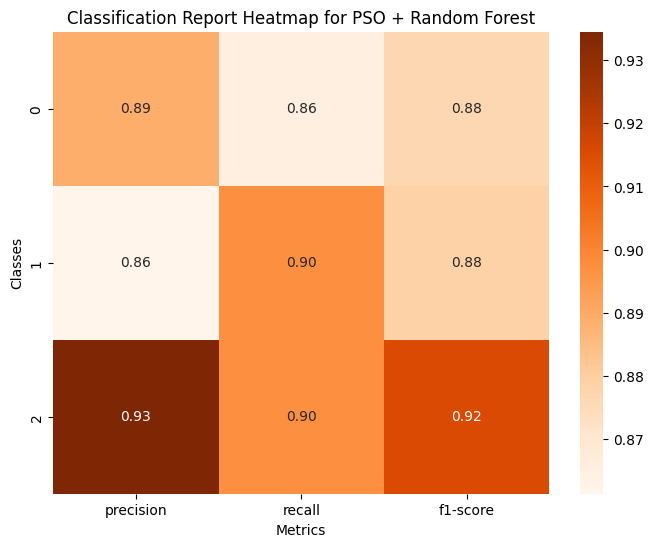

In [ ]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
df_report_rf = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report_rf.loc[df_report_rf.index[:-3], metrics], annot=True, cmap='Oranges', fmt=".2f")

plt.title('Classification Report Heatmap for PSO + Random Forest')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

n_particles = 30
n_iterations = 50
n_features = X_train.shape[1]

w = 0.5
c1 = 1.5
c2 = 1.5

np.random.seed(42)

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)

personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = XGBClassifier(eval_metric='logloss', random_state=42)
        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)


global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

for iteration in range(n_iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = XGBClassifier(eval_metric='logloss', random_state=42)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

best_features_mask_xgb = global_best_position > 0.5
selected_feature_indices_xgb = np.where(best_features_mask_xgb)[0].tolist()

print("\nBest feature indices selected by PSO for XGBoost:")
print(selected_feature_indices_xgb)


Iteration 1/50, Best Accuracy: 0.8942
Iteration 2/50, Best Accuracy: 0.8942
Iteration 3/50, Best Accuracy: 0.8959
Iteration 4/50, Best Accuracy: 0.8976
Iteration 5/50, Best Accuracy: 0.9010
Iteration 6/50, Best Accuracy: 0.9010
Iteration 7/50, Best Accuracy: 0.9010
Iteration 8/50, Best Accuracy: 0.9010
Iteration 9/50, Best Accuracy: 0.9010
Iteration 10/50, Best Accuracy: 0.9010
Iteration 11/50, Best Accuracy: 0.9010
Iteration 12/50, Best Accuracy: 0.9010
Iteration 13/50, Best Accuracy: 0.9010
Iteration 14/50, Best Accuracy: 0.9010
Iteration 15/50, Best Accuracy: 0.9027
Iteration 16/50, Best Accuracy: 0.9027
Iteration 17/50, Best Accuracy: 0.9027
Iteration 18/50, Best Accuracy: 0.9027
Iteration 19/50, Best Accuracy: 0.9027
Iteration 20/50, Best Accuracy: 0.9027
Iteration 21/50, Best Accuracy: 0.9027
Iteration 22/50, Best Accuracy: 0.9027
Iteration 23/50, Best Accuracy: 0.9027
Iteration 24/50, Best Accuracy: 0.9027
Iteration 25/50, Best Accuracy: 0.9027
Iteration 26/50, Best Accuracy: 0.


Classification Report for XGBoost (using PSO-selected features):
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       148
           1       0.85      0.89      0.87       263
           2       0.94      0.88      0.91       175

    accuracy                           0.88       586
   macro avg       0.89      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



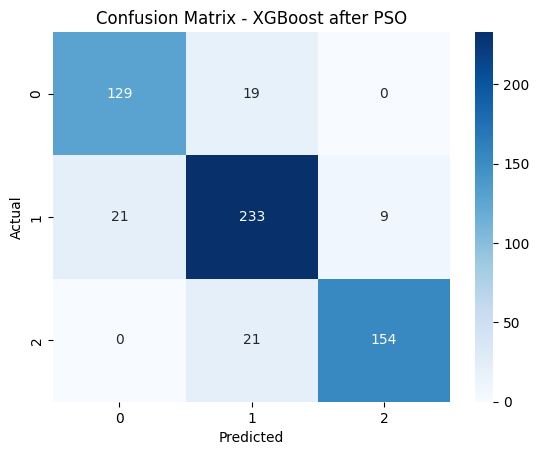

In [ ]:
X_train_xgb = X_train[:, best_features_mask_xgb]
X_test_xgb = X_test[:, best_features_mask_xgb]

model_xgb = XGBClassifier( eval_metric='logloss', random_state=44)
model_xgb.fit(X_train_xgb, y_train)
y_pred_xgb = model_xgb.predict(X_test_xgb)
print("\nClassification Report for XGBoost (using PSO-selected features):")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost after PSO")
plt.show()



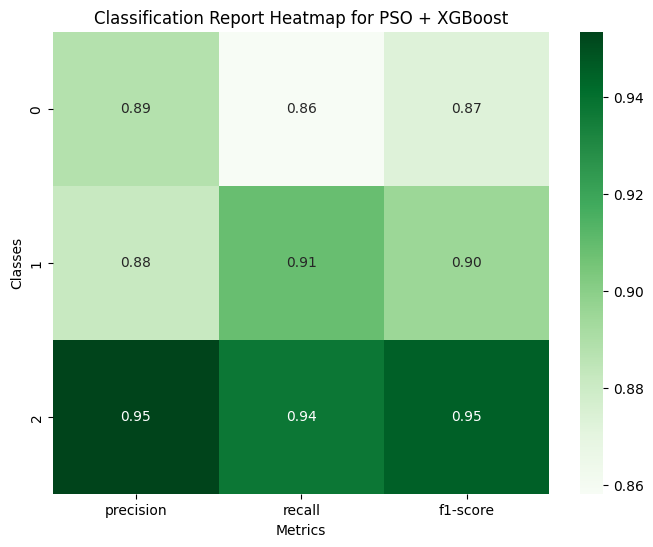

In [ ]:
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
df_report_xgb = pd.DataFrame(report_xgb).transpose()

plt.figure(figsize=(8,6))
metrics = ['precision', 'recall', 'f1-score']

sns.heatmap(df_report_xgb.loc[df_report_xgb.index[:-3], metrics], annot=True, cmap='Greens', fmt=".2f")

plt.title('Classification Report Heatmap for PSO + XGBoost')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()



---


# **comparisons**


---



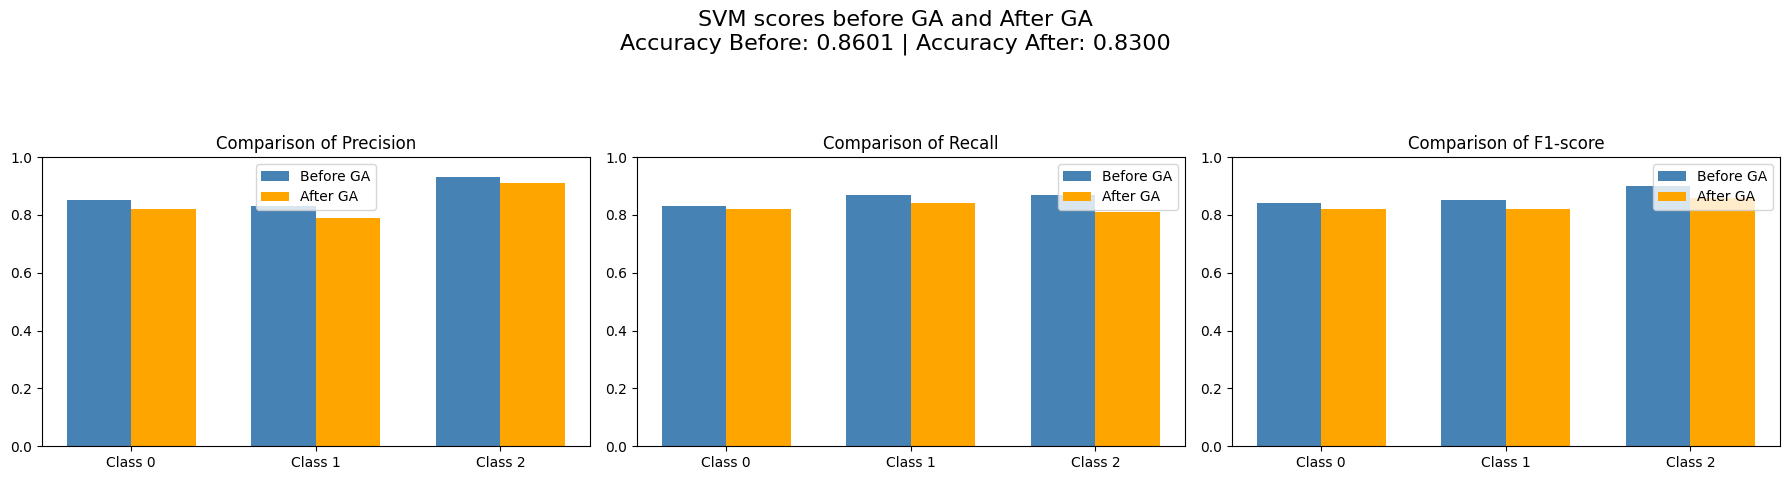

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']

before = {
    'precision': [0.85, 0.83, 0.93],
    'recall': [0.83, 0.87, 0.87],
    'f1-score': [0.84, 0.85, 0.90],
    'accuracy': 0.8601
}

after = {
    'precision': [0.82, 0.79, 0.91],
    'recall': [0.82, 0.84, 0.81],
    'f1-score': [0.82, 0.82, 0.86],
    'accuracy': 0.83
}

df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]

x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before GA', color='steelblue')
    axes[i].bar(x + width/2, df_after[metric], width, label='After GA', color='orange')

    axes[i].set_title(f'Comparison of {metric.capitalize()}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.suptitle(f"SVM scores before GA and After GA\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()


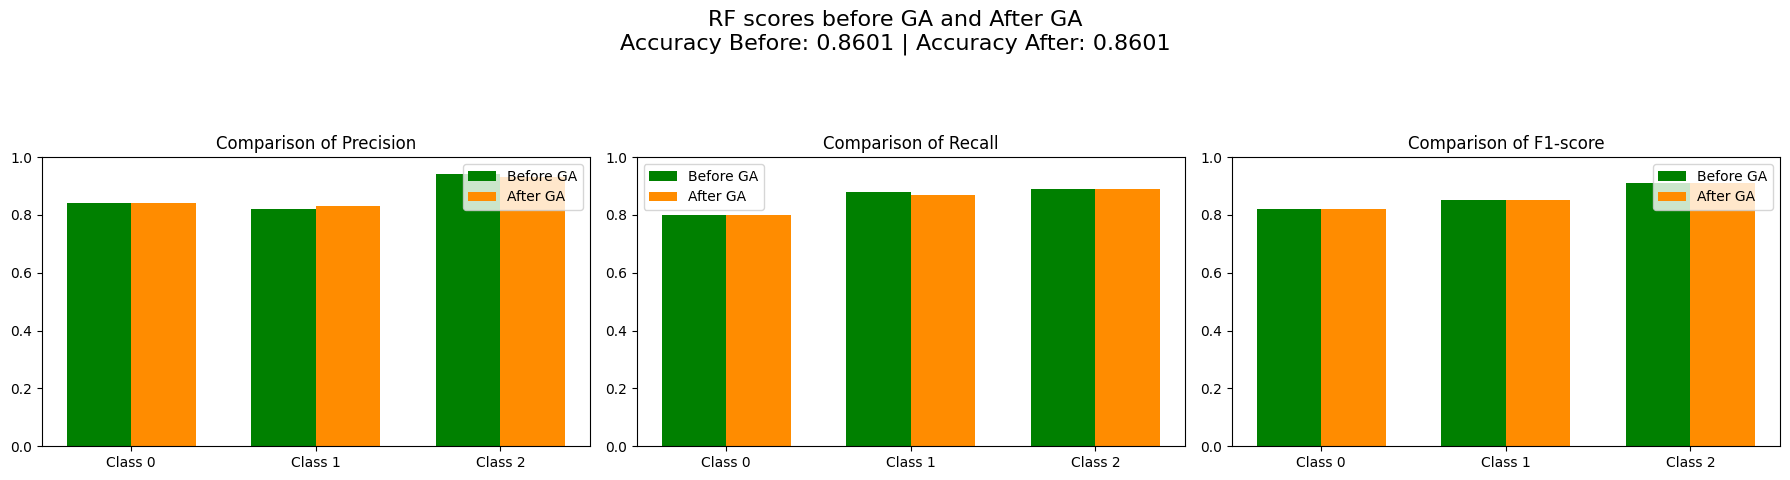

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']

before = {
    'precision': [0.84, 0.82, 0.94],
    'recall': [0.80, 0.88, 0.89],
    'f1-score': [0.82, 0.85, 0.91],
    'accuracy': 0.8601
}

after = {
    'precision': [0.84, 0.83, 0.93],
    'recall': [0.80, 0.87, 0.89],
    'f1-score': [0.82, 0.85, 0.91],
    'accuracy': 0.8601
}

df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]


x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before GA', color='green')
    axes[i].bar(x + width/2, df_after[metric], width, label='After GA', color='darkorange')

    axes[i].set_title(f'Comparison of {metric.capitalize()}', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.suptitle(f"RF scores before GA and After GA\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()


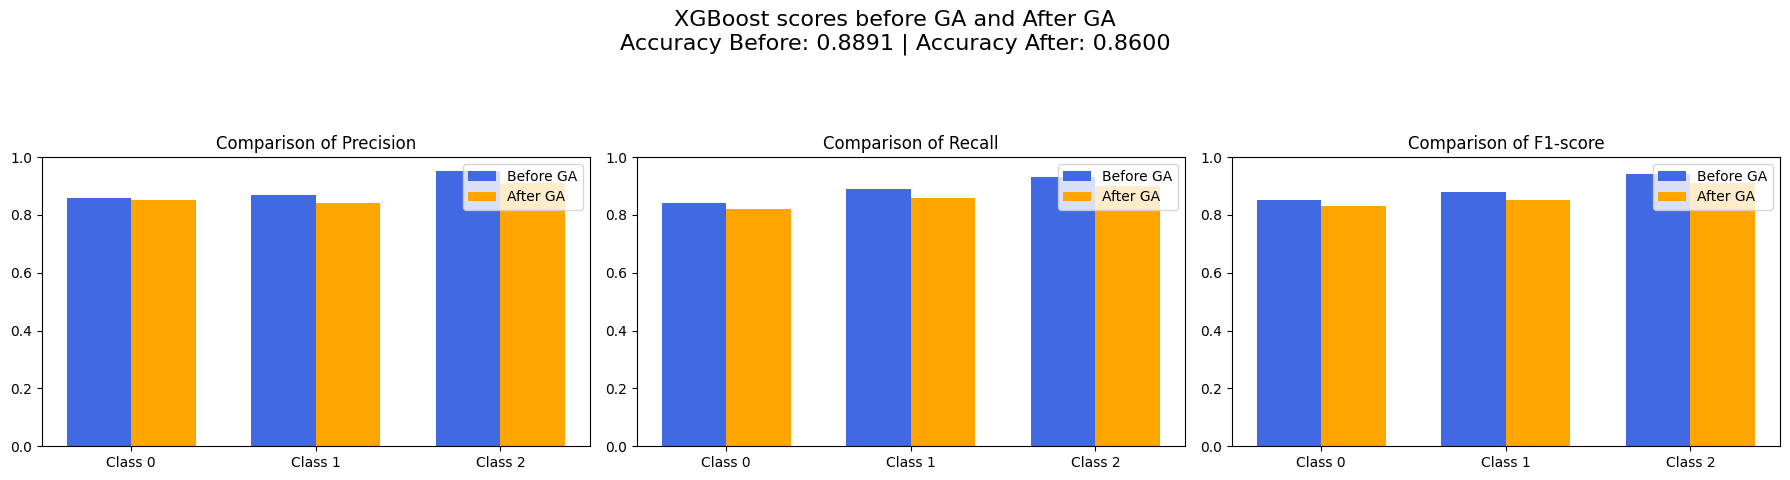

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']

before = {
    'precision': [0.86, 0.87, 0.95],
    'recall': [0.84, 0.89, 0.93],
    'f1-score': [0.85, 0.88, 0.94],
    'accuracy': 0.8891
}

after = {
    'precision': [0.85, 0.84, 0.91],
    'recall': [0.82, 0.86, 0.90],
    'f1-score': [0.83, 0.85, 0.91],
    'accuracy': 0.86
}


df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]

x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before GA', color='royalblue')
    axes[i].bar(x + width/2, df_after[metric], width, label='After GA', color='orange')

    axes[i].set_title(f'Comparison of {metric.capitalize()}', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()


plt.suptitle(f"XGBoost scores before GA and After GA\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()


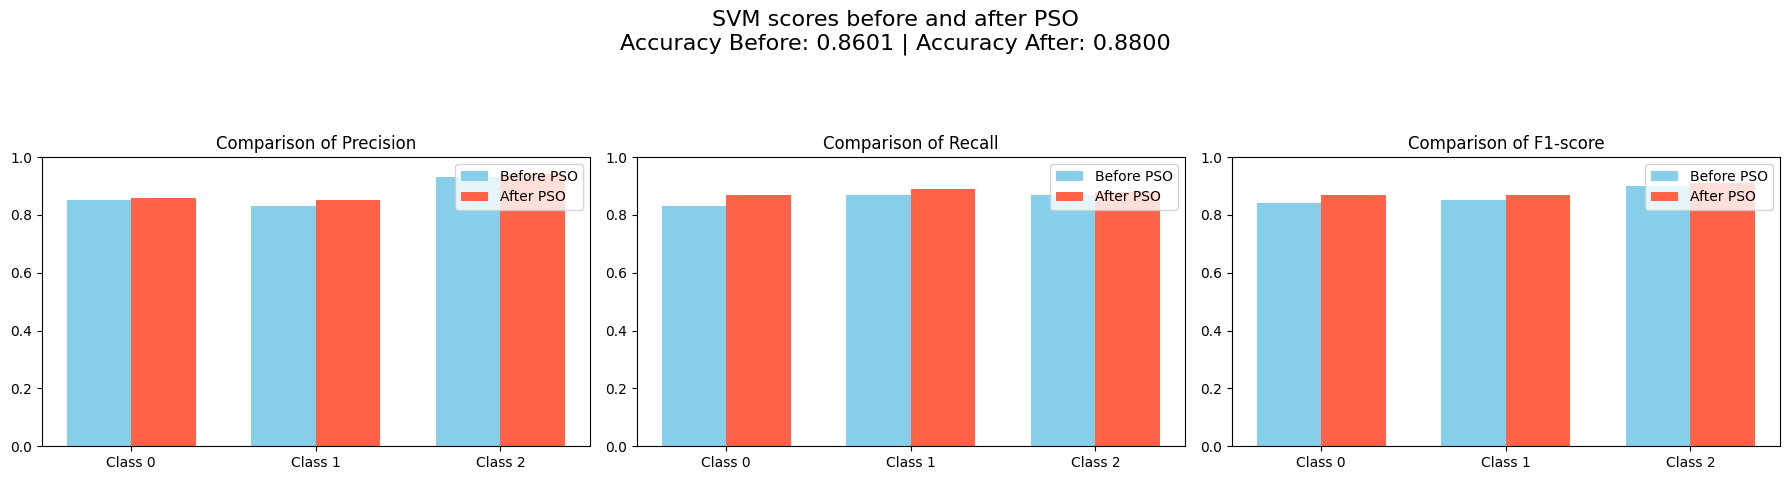

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']


before = {
    'precision': [0.85, 0.83, 0.93],
    'recall': [0.83, 0.87, 0.87],
    'f1-score': [0.84, 0.85, 0.90],
    'accuracy': 0.8601
}


after = {
    'precision': [0.86, 0.85, 0.94],
    'recall': [0.87, 0.89, 0.88],
    'f1-score': [0.87, 0.87, 0.91],
    'accuracy': 0.88
}


df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]


x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before PSO', color='skyblue')
    axes[i].bar(x + width/2, df_after[metric], width, label='After PSO', color='tomato')

    axes[i].set_title(f'Comparison of {metric.capitalize()}', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.suptitle(f"SVM scores before and after PSO\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()


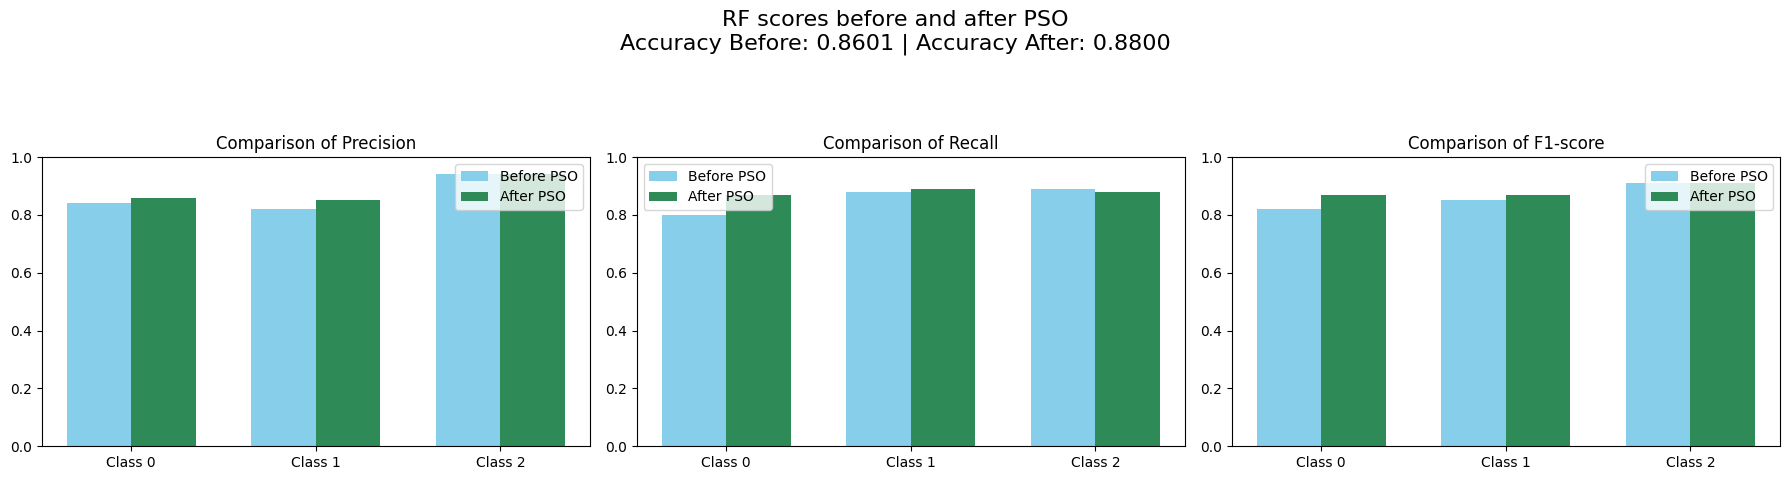

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']


before = {
    'precision': [0.84, 0.82, 0.94],
    'recall': [0.80, 0.88, 0.89],
    'f1-score': [0.82, 0.85, 0.91],
    'accuracy': 0.8601
}


after = {
    'precision': [0.86, 0.85, 0.94],
    'recall': [0.87, 0.89, 0.88],
    'f1-score': [0.87, 0.87, 0.91],
    'accuracy': 0.88
}


df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]


x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before PSO', color='skyblue')
    axes[i].bar(x + width/2, df_after[metric], width, label='After PSO', color='seagreen')

    axes[i].set_title(f'Comparison of {metric.capitalize()}', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.suptitle(f"RF scores before and after PSO\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

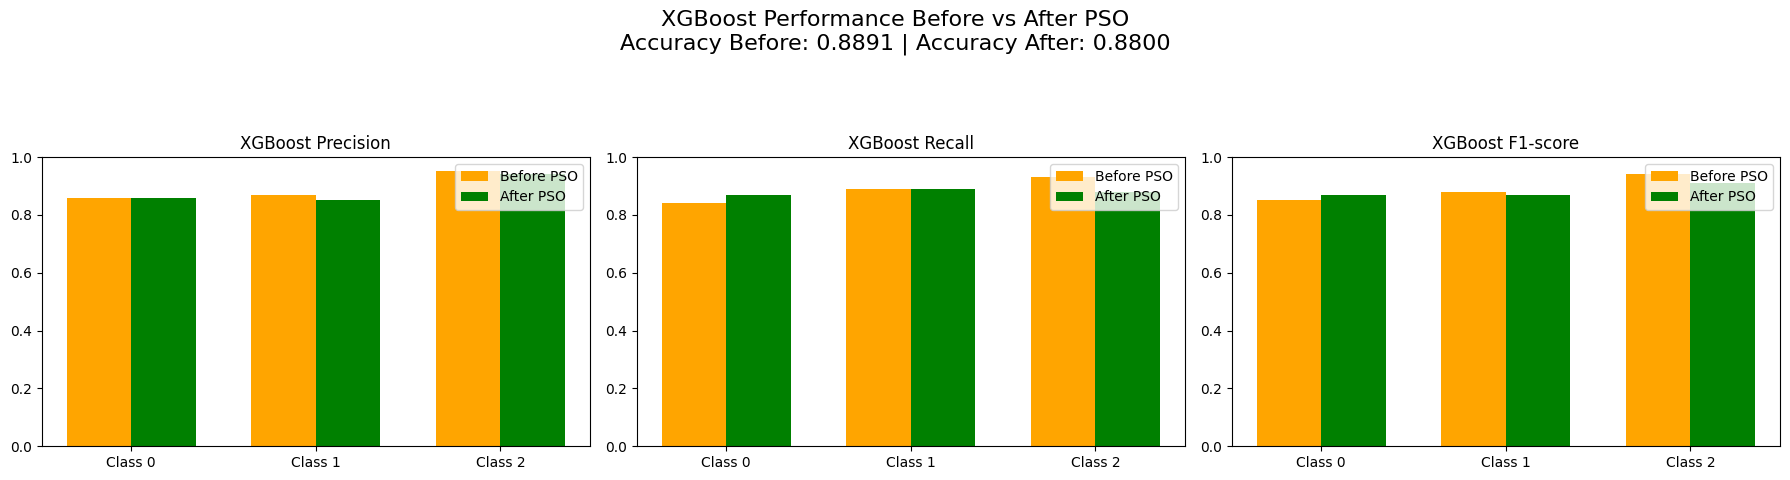

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']


before = {
    'precision': [0.86, 0.87, 0.95],
    'recall': [0.84, 0.89, 0.93],
    'f1-score': [0.85, 0.88, 0.94],
    'accuracy': 0.8891
}


after = {
    'precision': [0.86, 0.85, 0.94],
    'recall': [0.87, 0.89, 0.88],
    'f1-score': [0.87, 0.87, 0.91],
    'accuracy': 0.88
}


df_before = pd.DataFrame(before, index=classes)[metrics]
df_after = pd.DataFrame(after, index=classes)[metrics]


x = np.arange(len(classes))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(x - width/2, df_before[metric], width, label='Before PSO', color='orange')
    axes[i].bar(x + width/2, df_after[metric], width, label='After PSO', color='green')

    axes[i].set_title(f'XGBoost {metric.capitalize()}', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1)
    axes[i].legend()

plt.suptitle(f"XGBoost Performance Before vs After PSO\nAccuracy Before: {before['accuracy']:.4f} | Accuracy After: {after['accuracy']:.4f}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()
